In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introducción
En este proyecto se realizarán los análisis básicos de la ciencia de datos para el dataset "Churn Modeling" el cual es una representación sencilla de unas cuentas de banco de crédito en algunos paises. El proyecto está en español debido a que no he visto ningun proyecto en este idioma y si hay otro mas, espero que este les ayude a cada lector que pueda entender lo básico de los análisis que se hicieron a continuación.

# Lectura de datos

In [16]:
df = pd.read_csv("/workspaces/workspaceAI/CEIABD_MODULOS_IA/_Ejercicios/datasets/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


A continuación se hace un describe del dataset, para ver ciertaa información que podemos utilizar en el análisis posterior y se ven los primeros datos del dataset.

In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Separacion y descripcion de la columna "CreditScore"
En este caso es una buena idea poder separar la columna de "CreditScore" ya que se pueden hacer operaciones como obtener la varianza y la mediana de la misma, esto puede ayudar a encontrar un punto medio de cada uno de los datos y poder partir de ese punto a un analisis por medio de centroides. En este caso no lo usaremos pero siempre es util tener estos datos.

In [19]:
dfCreditScore = df['CreditScore']
dfCreditScore

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [20]:
varianza = df['CreditScore'].var()
mediana = df['CreditScore'].median()
print(dfCreditScore.describe())
print(varianza)
print(mediana)

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
9341.860156575658
652.0


# Normalizacion y Escalamiento
La normalización es crucial si se quiere obtener datos y graficos correctos, la normalizacion hace que todos los datos quepan dentro de un parametro entre 0 y 1, esto para que en un analisis de graficas puedan graficarse mas facil y tenga mas sentido el grafico.

In [21]:
new_df = pd.read_csv("/workspaces/workspaceAI/CEIABD_MODULOS_IA/_Ejercicios/datasets/Churn_Modelling.csv")

Aqui lo que hago es hacer un pequeño dataset con las columnas que me interesa analizar debido a que son los datos numericos mas importantes del dataset, el credito que tenga el cliente, el salario estimado de los clientes y el balance osea el dinero que se tiene depositado en cuentas de debito, estos datos ayudaran a tener graficas que ayuden a tener relaciones con otros datos y ver algun patron dentro de ellos.

In [22]:
new_df = pd.DataFrame()
new_df.insert(0, "CreditScore", df['CreditScore'])
new_df.insert(0, "EstimatedSalary", df['EstimatedSalary'])
new_df.insert(0, "Balance", df['Balance'])

In [23]:
new_df

,Balance,EstimatedSalary,CreditScore
0,0.00,101348.88,619
1,83807.86,112542.58,608
2,159660.80,113931.57,502
3,0.00,93826.63,699
4,125510.82,79084.10,850
...,...,...,...
9995,0.00,96270.64,771
9996,57369.61,101699.77,516
9997,0.00,42085.58,709
9998,75075.31,92888.52,772


**Escalamiento**

In [24]:
CreditScoreScaler = preprocessing.MinMaxScaler().fit_transform(df[['CreditScore']])
EstimatedSalaryScaler = preprocessing.MinMaxScaler().fit_transform(df[['EstimatedSalary']])
BalanceScaler = preprocessing.MinMaxScaler().fit_transform(df[['Balance']])


new_df.insert(0, "CreditScoreEscaled", CreditScoreScaler)
new_df.insert(0, "EstimatedSalaryEscaled", EstimatedSalaryScaler)
new_df.insert(0, "BalanceBalanced", BalanceScaler)

In [25]:
new_df

,BalanceBalanced,EstimatedSalaryEscaled,CreditScoreEscaled,Balance,EstimatedSalary,CreditScore
0,0.000000,0.506735,0.538,0.00,101348.88,619
1,0.334031,0.562709,0.516,83807.86,112542.58,608
2,0.636357,0.569654,0.304,159660.80,113931.57,502
3,0.000000,0.469120,0.698,0.00,93826.63,699
4,0.500246,0.395400,1.000,125510.82,79084.10,850
...,...,...,...,...,...,...
9995,0.000000,0.481341,0.842,0.00,96270.64,771
9996,0.228657,0.508490,0.332,57369.61,101699.77,516
9997,0.000000,0.210390,0.718,0.00,42085.58,709
9998,0.299226,0.464429,0.844,75075.31,92888.52,772


# Etiquetado
El etiquetado sirve para poder tener parametros sencillos de analizar en lugar de letras que son muy dificiles de hacer calculos con ellos, de hecho no se puede, por lo que, hice un etiquetado por generos, esto para ayudar a un analisis posterior que veremos despues.

In [26]:
le = preprocessing.LabelEncoder()
le.fit(df['Gender'])

dataT = (le.transform(df['Gender']))

df.insert(5, "Labels_gender", dataT)

new_df.insert(5, "Labels_gender", dataT)


In [27]:
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Labels_gender  \
0             1    15634602   Hargrave          619    France              0   
1             2    15647311       Hill          608     Spain              0   
2             3    15619304       Onio          502    France              0   
3             4    15701354       Boni          699    France              0   
4             5    15737888   Mitchell          850     Spain              0   
...         ...         ...        ...          ...       ...            ...   
9995       9996    15606229   Obijiaku          771    France              1   
9996       9997    15569892  Johnstone          516    France              1   
9997       9998    15584532        Liu          709    France              0   
9998       9999    15682355  Sabbatini          772   Germany              1   
9999      10000    15628319     Walker          792    France              0   

      Gender  Age  Tenure    Balance  N

# Matriz de correlación
Una matriz ayuda a saber que relacion hay entre columnas, si hay datos que tienen cierta conexión entre ellos se pueden visualizar por un datos que si se acerca mas al 1, es porque tiene relacion relevante que podemos analizar.

In [28]:
corrdf = df.corr()
corrdf

ValueError: could not convert string to float: 'Hargrave'

Esta grafica muestra dicha relacion de los datos, en este caso vemos que casi ninguna columna esta realcionada con otra excepto la edad y la cantidad de personas que continuan o se salen del credito del banco, esto parece indicar que mientras mayores son las personas dejan de buscar creditos y quieren mas ahorros.

/tmp/ipykernel_20/2251557459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(df.corr(), annot = True)


Text(0.5, 1.0, 'ChurnModeling')

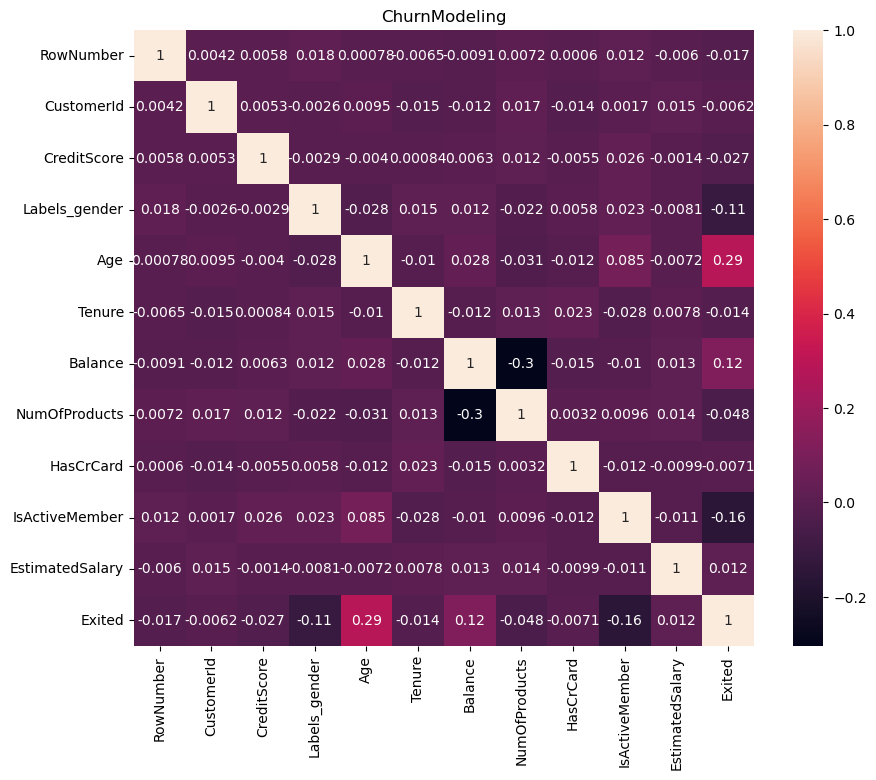

In [ ]:
plt.figure(figsize=(10,8))
plot = sns.heatmap(df.corr(), annot = True)
plot.set_title("ChurnModeling")

Estas graficas son para ver el comportamiento de los datos conforme a lo que nosotos queremos relacionar, pero en estas graficas no ns dicen nada aun.

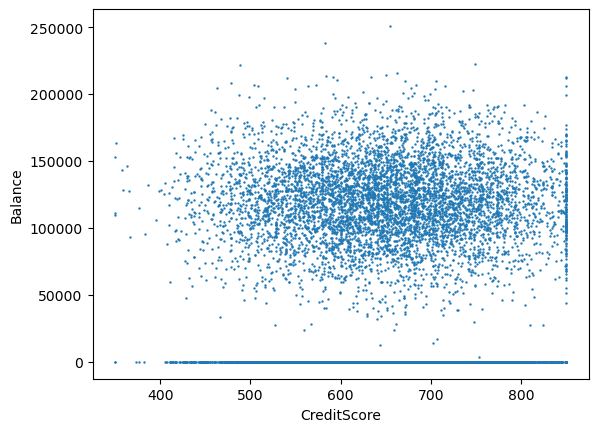

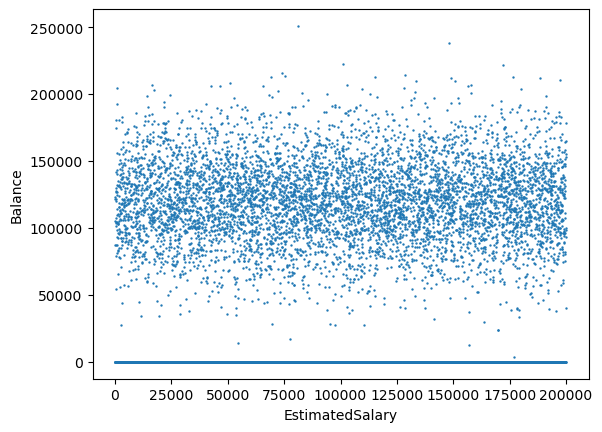

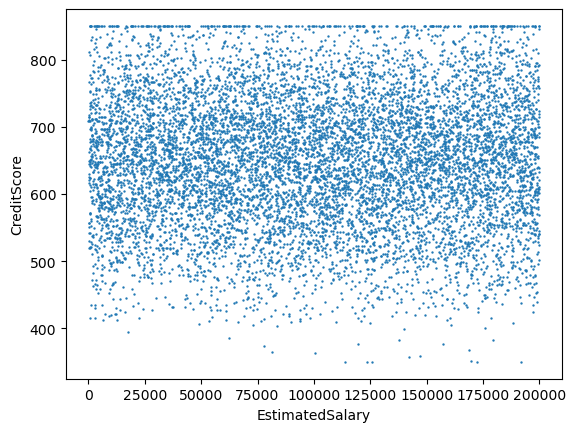

In [ ]:
my_plot = df.plot("CreditScore", "Balance", kind="scatter", s=0.5)
my_plot2 = df.plot("EstimatedSalary", "Balance", kind="scatter", s=0.5)
my_plot3 = df.plot("EstimatedSalary", "CreditScore", kind="scatter", s=0.5)

# Clustering
Aqui es donde empieza a tomar forma las graficas anteriores, pues el clustering forma grupos de datos que esten relacionados entre si, en este caso usaremos el metodo de KMeans lo cual hace que conforme a la cantidad de grupos que queremos tener como por ejemplo, VIP, Buen Credito y principiante o algo por el estilo, en este caso no usamos el elbow point para ver los grupos correctos, sino que lo haremos conforme los grupos que tiene un banco convencional como lo antes mencionados.

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(new_df[['CreditScoreEscaled', 'BalanceBalanced']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
new_df["kmeans_3"] = kmeans.labels_

In [ ]:
new_df

,BalanceBalanced,EstimatedSalaryEscaled,CreditScoreEscaled,Balance,EstimatedSalary,Labels_gender,CreditScore,kmeans_3
0,0.000000,0.506735,0.538,0.00,101348.88,0,619,2
1,0.334031,0.562709,0.516,83807.86,112542.58,0,608,0
2,0.636357,0.569654,0.304,159660.80,113931.57,0,502,0
3,0.000000,0.469120,0.698,0.00,93826.63,0,699,2
4,0.500246,0.395400,1.000,125510.82,79084.10,0,850,1
...,...,...,...,...,...,...,...,...
9995,0.000000,0.481341,0.842,0.00,96270.64,1,771,2
9996,0.228657,0.508490,0.332,57369.61,101699.77,1,516,0
9997,0.000000,0.210390,0.718,0.00,42085.58,0,709,2
9998,0.299226,0.464429,0.844,75075.31,92888.52,1,772,1


En esta grafica podemos mostrar los datos que estan en los grupos correspondientes, poniendo los de la derecha como los de alto valor crediticio para el banco, los de la izquierda como los potenciales a mejorar y los de abajo los que no estan interesados o apenas estan empezando un historial crediticio.

<Axes: xlabel='CreditScore', ylabel='Balance'>

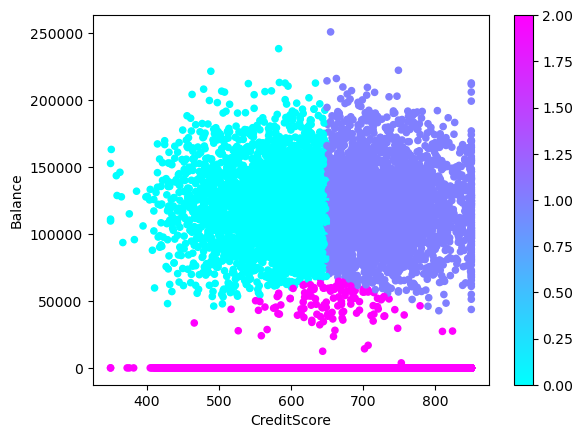

In [ ]:
new_df.plot("CreditScore", "Balance", kind="scatter", c=new_df['kmeans_3'], cmap="cool")

Aqui hacemos que solo muestren cuales son los paises en donde residen los clientes, en este caso no funciona debido a que los datos son muy proporcionales en cantidad, pero en casos mas realistas esto ayuda mucho para un analisis posterior mas especifico por paises de residencia de los clientes.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['Geography'])

dataT = (le.transform(df['Geography']))

new_df.insert(0, "Labels_country", dataT)

In [ ]:
new_df

,Labels_country,BalanceBalanced,EstimatedSalaryEscaled,CreditScoreEscaled,Balance,EstimatedSalary,Labels_gender,CreditScore,kmeans_3
0,0,0.000000,0.506735,0.538,0.00,101348.88,0,619,2
1,2,0.334031,0.562709,0.516,83807.86,112542.58,0,608,0
2,0,0.636357,0.569654,0.304,159660.80,113931.57,0,502,0
3,0,0.000000,0.469120,0.698,0.00,93826.63,0,699,2
4,2,0.500246,0.395400,1.000,125510.82,79084.10,0,850,1
...,...,...,...,...,...,...,...,...,...
9995,0,0.000000,0.481341,0.842,0.00,96270.64,1,771,2
9996,0,0.228657,0.508490,0.332,57369.61,101699.77,1,516,0
9997,0,0.000000,0.210390,0.718,0.00,42085.58,0,709,2
9998,1,0.299226,0.464429,0.844,75075.31,92888.52,1,772,1


<Axes: xlabel='CreditScore', ylabel='Balance'>

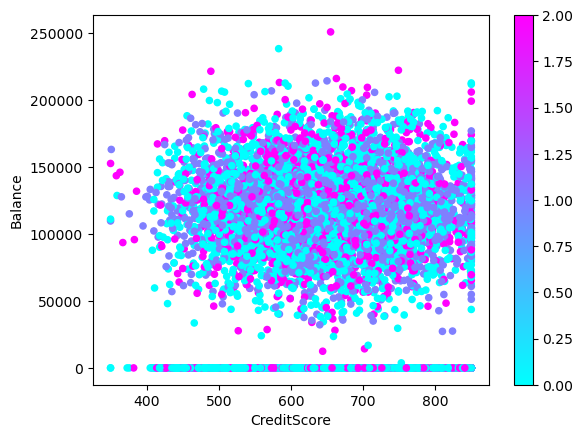

In [ ]:
new_df.plot("CreditScore","Balance", kind="scatter", c=new_df['Labels_country'], cmap="cool")

Aqui hacemos lo mismo pero por sexos de los clientes, lo cual igualmente en este caso no ayuda mucho pero en casos mas reales es mejor para un analisis mas especifico.

<Axes: xlabel='CreditScore', ylabel='Balance'>

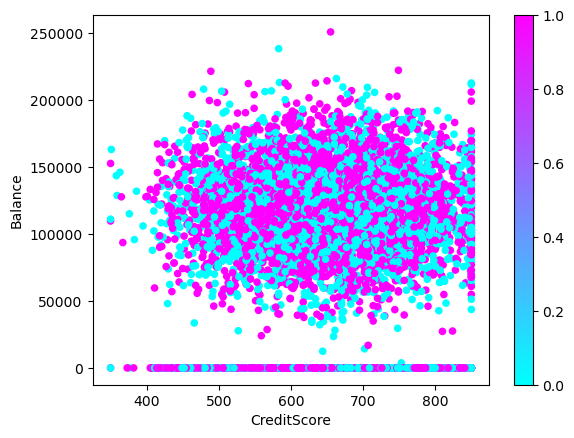

In [ ]:
new_df.plot("CreditScore","Balance", kind="scatter", c=new_df['Labels_gender'], cmap="cool")

# Conclusiones
La unica conclusion que pudimos sacar de este dataset es que los clientes al incrementar su edad son los que mas dejan de tener creditos, las razones son variables pero es una tendencia que se observa en los datos, al igual pudimos hacer ciertos grupos por medio de la clusterizacion que ayudan a poder tener mas especificamente el tipo de cliente que son para el banco.

Espero les haya ayudado por lo menos un poco.